In [1]:
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn import preprocessing

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn import linear_model
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE

import copy
import regex as re

In [2]:
loan_train = pd.read_csv("loan_train.csv")
loan_test = pd.read_csv("loan_test.csv")

In [3]:
# Set a random seed

random_seed = 94
np.random.seed(random_seed)

### Implementing SMOTE for imbalanced data

In [4]:
x = loan_train.loc[:, loan_train.columns != 'Label']
y = loan_train.loc[:, loan_train.columns == 'Label']

x_test = loan_test.loc[:, loan_test.columns != 'Label']
y_test = loan_test.loc[:, loan_test.columns == 'Label']

In [5]:
sm = SMOTE(random_state = 42)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = random_seed)

columns = x_train.columns

x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
x_train_sm = pd.DataFrame(data = x_train_sm, columns = columns)
y_train_sm = pd.DataFrame(data = y_train_sm, columns = ['Label'])

In [6]:
print("\033[1m Length of oversampled data is", len(x_train_sm))
print("\033[1m Number of 'Good' in oversampled data", len(y_train_sm[y_train_sm['Label'] == 0]))
print("\033[1m Number of 'Bad'", len(y_train_sm[y_train_sm['Label'] == 1]))
print("\033[1m Proportion of 'Good' data in oversampled data is", len(y_train_sm[y_train_sm['Label'] == 0])/len(x_train_sm))
print("\033[1m Proportion of 'Bad' data in oversampled data is", len(y_train_sm[y_train_sm['Label'] == 1])/len(x_train_sm))

 Length of oversampled data is 242
 Number of 'Good' in oversampled data 121
 Number of 'Bad' 121
 Proportion of 'Good' data in oversampled data is 0.5
 Proportion of 'Bad' data in oversampled data is 0.5


### Finding the most important features in the dataset

In [7]:
loan_cols = loan_train.columns.values.tolist()
y = ['Label']
x = [i for i in loan_cols if i not in y]

logreg = LogisticRegression(solver = 'lbfgs', max_iter = 10)
rfe = RFE(logreg)
rfe = rfe.fit(x_train_sm, y_train_sm.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True False False False False
  True  True  True  True  True  True  True  True False  True False False
  True  True False  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False]
[ 1  1  1  1  1  1  1  1  9  3  8  6  1  1  1  1  1  1  1  1  4  1  5  7
  1  1  2  1  1  1  1  1  1  1 14 16 26 22 25 12 13 19 15 11 20 24 17 10
 18 21 23 27]


/Users/Aishwarya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/Aishwarya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

In [8]:
data_X1 = pd.DataFrame({
 'Feature': x_train_sm.columns,
 'Importance': rfe.ranking_},)

data_X1.sort_values(by = ['Importance'])

,Feature,Importance
0,Revenue,1
33,EBIT,1
32,EBITDA,1
31,Total Equity,1
30,Retained Earning,1
29,Paid Up Capital,1
28,Total Liabilities,1
27,Hire Purchase Creditor_Long,1
24,Amount owing to directors/shareholders/related...,1
21,Term Loan,1


In [9]:
cols = []
for i in range (0, len(data_X1['Importance'])): 
    if data_X1['Importance'][i] == 1:
        cols.append(data_X1['Feature'][i])

print(cols)
print(len(cols))

['Revenue', 'Sales', 'other Rev', 'COGS', 'Gross Profit', 'total other Income', 'Total salary and expense', 'Total operating expense', 'Net Income', 'Cash', 'Receivables', 'Inventories', 'Total Current Asset', 'Total Fixed Asset', 'Intangible Asset', 'Total Asset', 'Term Loan', 'Amount owing to directors/shareholders/related parties', 'Total Current Liabilities', 'Hire Purchase Creditor_Long', 'Total Liabilities', 'Paid Up Capital', 'Retained Earning', 'Total Equity', 'EBITDA', 'EBIT']
26


In [10]:
x = x_train_sm[cols]
y = y_train_sm['Label']

### Implementing Logistic Regression

In [11]:
# Define the range of regularization parameters to explore
reg = [0.001, 0.01, 0.1, 1, 10]

#### Fitting the train dataset

In [12]:
# Perform hyperparameter tuning with cross-validation
logreg_cv = LogisticRegressionCV(Cs = reg, cv = 10)

logreg_cv.fit(x_train_sm, y_train_sm.values.ravel())

/Users/Aishwarya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/Aishwarya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10], cv=10)

In [13]:
# Get the best regularization parameter found during cross-validation
best_reg_param = logreg_cv.C_[0]

print("Best Regularization Parameter:", best_reg_param)

Best Regularization Parameter: 10.0


#### Predicting the values for the validation dataset

In [14]:
# Predict using the best model on the validation data

y_val_pred = logreg_cv.predict(x_val)

In [15]:
# Evaluate model performance on the validation data

val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Calculate predicted probabilities for the bad class
y_val_prob = logreg_cv.predict_proba(x_val)[:, 1]

Validation Accuracy: 0.8823529411764706


In [16]:
# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_val, y_val_prob)

# Print the ROC AUC and confusion matrix
print("ROC AUC:", auc)


ROC AUC: 0.8896551724137931


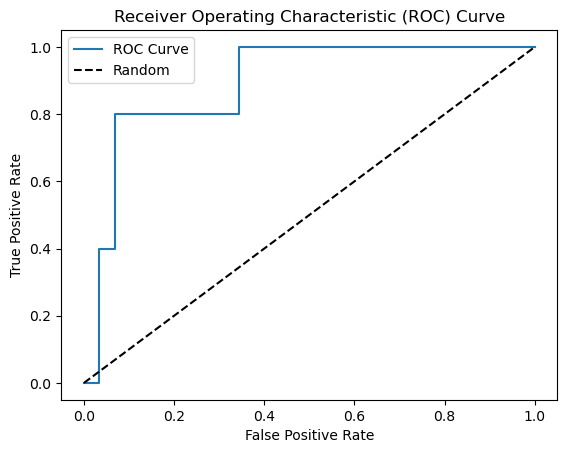

In [17]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

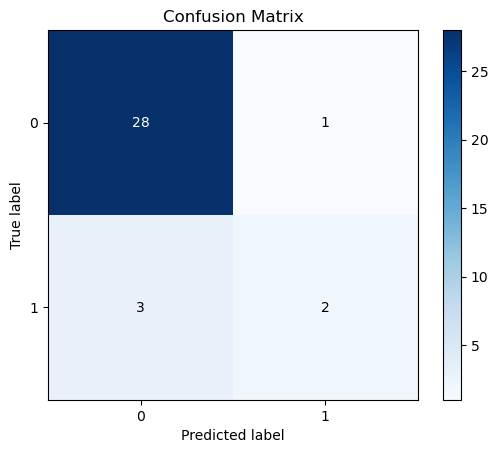

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.67      0.40      0.50         5

    accuracy                           0.88        34
   macro avg       0.78      0.68      0.72        34
weighted avg       0.87      0.88      0.87        34



In [18]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax = ax)

# Set labels, title, and ticks
ax.set(xticks = np.arange(cm.shape[1]),
       yticks = np.arange(cm.shape[0]),
       xlabel = 'Predicted label',
       ylabel = 'True label',
       title = 'Confusion Matrix')

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha = "center", va = "center",
                color="white" if cm[i, j] > cm.max() / 2 else "black")

# Display the plot
plt.show()

cm = classification_report(y_val, y_val_pred)

print(cm)

#### Predicting for the test dataset

In [19]:
# Predict using the best model on the test data

y_test_pred = logreg_cv.predict(x_test)

In [20]:
# Evaluate model performance on the test data

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_test_pred)

# Print the ROC AUC 
print("ROC AUC:", auc)


Test Accuracy: 0.6111111111111112
ROC AUC: 0.5833333333333334


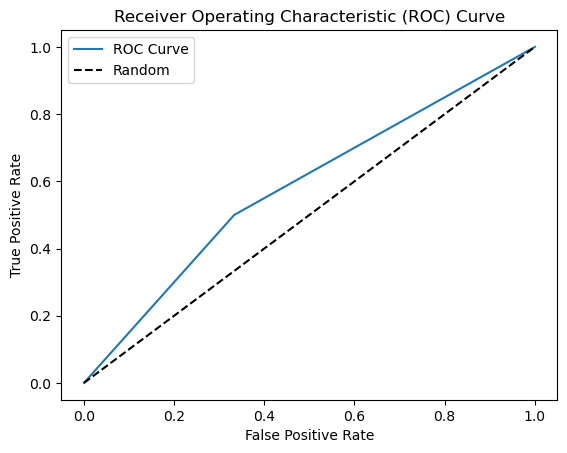

In [21]:
# Plot the ROC curve
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


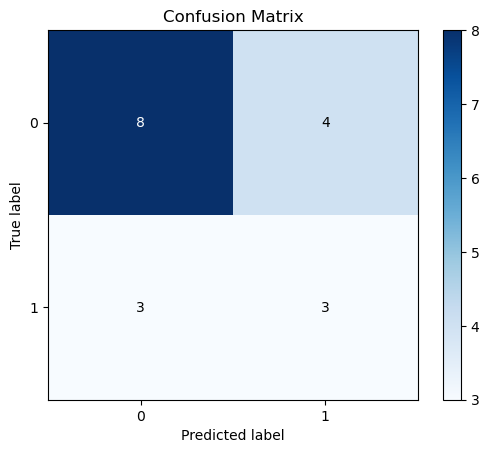

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.43      0.50      0.46         6

    accuracy                           0.61        18
   macro avg       0.58      0.58      0.58        18
weighted avg       0.63      0.61      0.62        18



In [22]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax = ax)

# Set labels, title, and ticks
ax.set(xticks = np.arange(cm.shape[1]),
       yticks = np.arange(cm.shape[0]),
       xlabel = 'Predicted label',
       ylabel = 'True label',
       title = 'Confusion Matrix')

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha = "center", va = "center",
                color="white" if cm[i, j] > cm.max() / 2 else "black")

# Display the plot
plt.show()

cm = classification_report(y_test, y_test_pred)

print(cm)

### Logistic Regression on Scaled Data

#### Scaling the Data

In [23]:
def scaling(x, y):
    scale = preprocessing.RobustScaler()
    x_t1 = scale.fit_transform(x, y)
    x_t1 = pd.DataFrame(x_t1, columns = x.columns)
    
    scale = preprocessing.StandardScaler()
    x_t2 = scale.fit_transform(x_t1, y)
    x_t2 = pd.DataFrame(x_t2, columns = x.columns)
    
    return(x_t2)

In [24]:
x_train_scaled = scaling(x_train_sm, y_train_sm)
x_test_scaled = scaling(x_test, y_test)
x_val_scaled = scaling(x_val, y_val)

#### Setting the regularisation parameter

In [25]:
# Define the range of regularization parameters to explore
reg_scaled = [0.001, 0.01, 0.1, 1, 10]

#### Fitting the train data 

In [26]:
# Perform hyperparameter tuning with cross-validation
logreg_cv_scaled = LogisticRegressionCV(Cs = reg_scaled, cv = 10)

logreg_cv_scaled.fit(x_train_scaled, y_train_sm.values.ravel())

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10], cv=10)

In [27]:
# Get the best regularization parameter found during cross-validation
best_reg_param = logreg_cv_scaled.C_[0]

print("Best Regularization Parameter:", best_reg_param)

Best Regularization Parameter: 10.0


#### Predicting the values for the validation dataset

In [28]:
# Predict using the best model on the validation data

y_val_pred = logreg_cv_scaled.predict(x_val_scaled)

In [29]:
# Evaluate model performance on the validation data

val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Calculate predicted probabilities for the bad class
y_val_prob = logreg_cv_scaled.predict_proba(x_val_scaled)[:, 1]

Validation Accuracy: 0.6764705882352942


In [30]:
# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_val, y_val_prob)

# Print the ROC AUC
print("ROC AUC:", auc)

ROC AUC: 0.7241379310344827


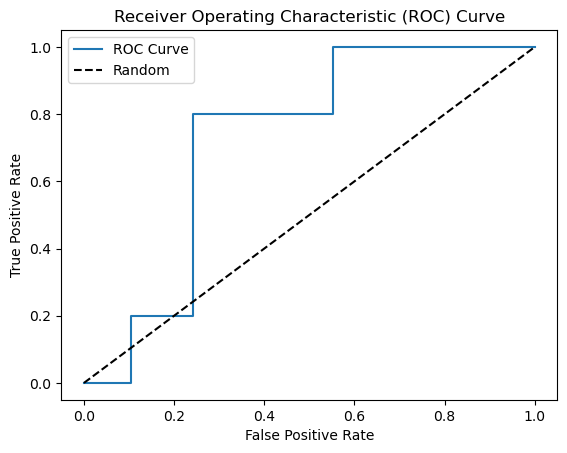

In [31]:
# Plot the ROC curve
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


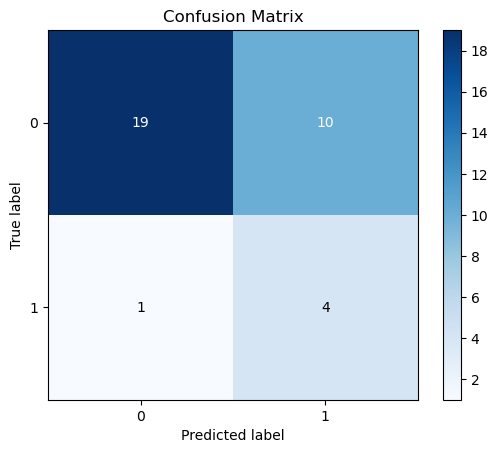

              precision    recall  f1-score   support

           0       0.95      0.66      0.78        29
           1       0.29      0.80      0.42         5

    accuracy                           0.68        34
   macro avg       0.62      0.73      0.60        34
weighted avg       0.85      0.68      0.72        34



In [32]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax = ax)

# Set labels, title, and ticks
ax.set(xticks = np.arange(cm.shape[1]),
       yticks = np.arange(cm.shape[0]),
       xlabel = 'Predicted label',
       ylabel = 'True label',
       title = 'Confusion Matrix')

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha = "center", va = "center",
                color="white" if cm[i, j] > cm.max() / 2 else "black")

# Display the plot
plt.show()

cm = classification_report(y_val, y_val_pred)

print(cm)

#### Predicting values for test data

In [33]:
# Predict using the best model on the test data

y_test_pred = logreg_cv_scaled.predict(x_test_scaled)

In [34]:
# Evaluate model performance on the test data

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_test_pred)

# Print the ROC AUC and confusion matrix
print("ROC AUC:", auc)

Test Accuracy: 0.6666666666666666
ROC AUC: 0.625


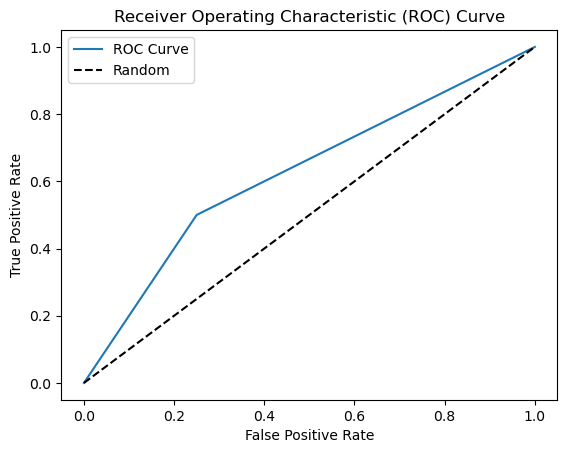

In [35]:
# Plot the ROC curve
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

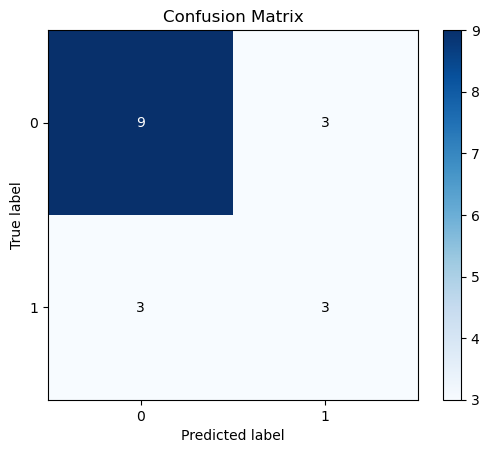

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.50      0.50      0.50         6

    accuracy                           0.67        18
   macro avg       0.62      0.62      0.62        18
weighted avg       0.67      0.67      0.67        18



In [36]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax = ax)

# Set labels, title, and ticks
ax.set(xticks = np.arange(cm.shape[1]),
       yticks = np.arange(cm.shape[0]),
       xlabel = 'Predicted label',
       ylabel = 'True label',
       title = 'Confusion Matrix')

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha = "center", va = "center",
                color="white" if cm[i, j] > cm.max() / 2 else "black")

# Display the plot
plt.show()

cm = classification_report(y_test, y_test_pred)

print(cm)